In [2]:
import pandas as pd

df = pd.read_csv('energy-data.csv')
display(
    df.head(),
    df.info(),
    df.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


None

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


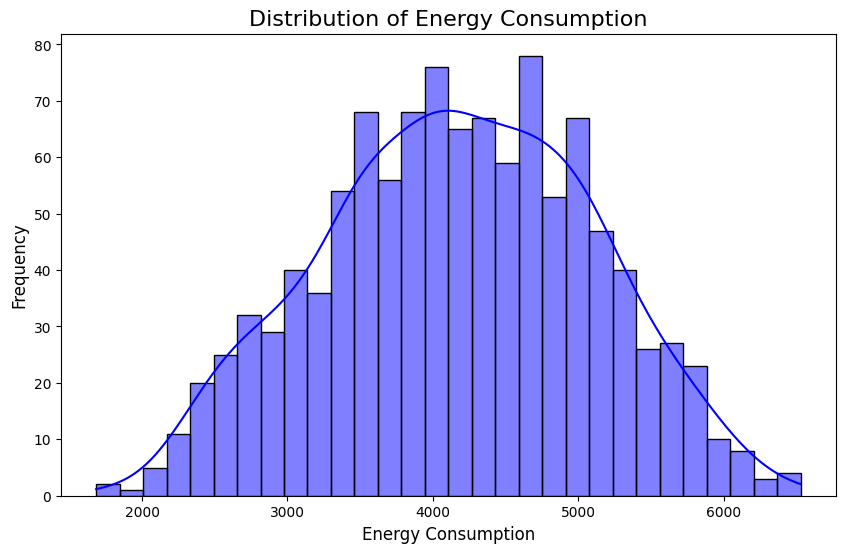

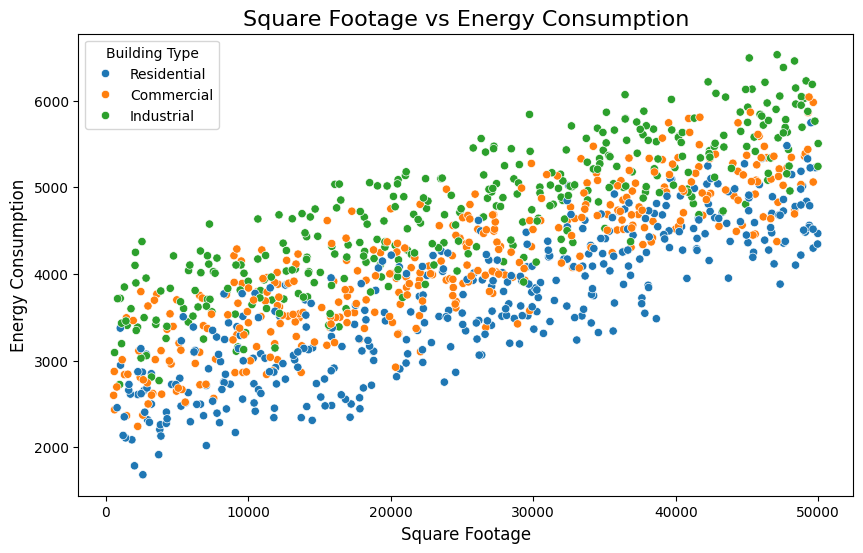

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Energy Consumption'], kde=True, color='blue', bins=30)
plt.title('Distribution of Energy Consumption', fontsize=16)
plt.xlabel('Energy Consumption', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Square Footage', y='Energy Consumption', hue='Building Type')
plt.title('Square Footage vs Energy Consumption', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.show()

In [4]:
# one-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Building Type', 'Day of Week'], drop_first=True)
df_encoded.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Energy Consumption'])
y = df_encoded['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np
def summary(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Energy Consumption')
    plt.ylabel('Predicted Energy Consumption')
    plt.title('Actual vs Predicted Energy Consumption (Random Forest)')
    plt.legend()
    plt.grid(True)
    plt.show()

    df_actual_predicted = pd.DataFrame({
        'Actual Energy Consumption': y_test,
        'Predicted Energy Consumption (RF)': y_pred
    })
    print(df_actual_predicted.head())

Root Mean Squared Error (RMSE): 140.6770675883927


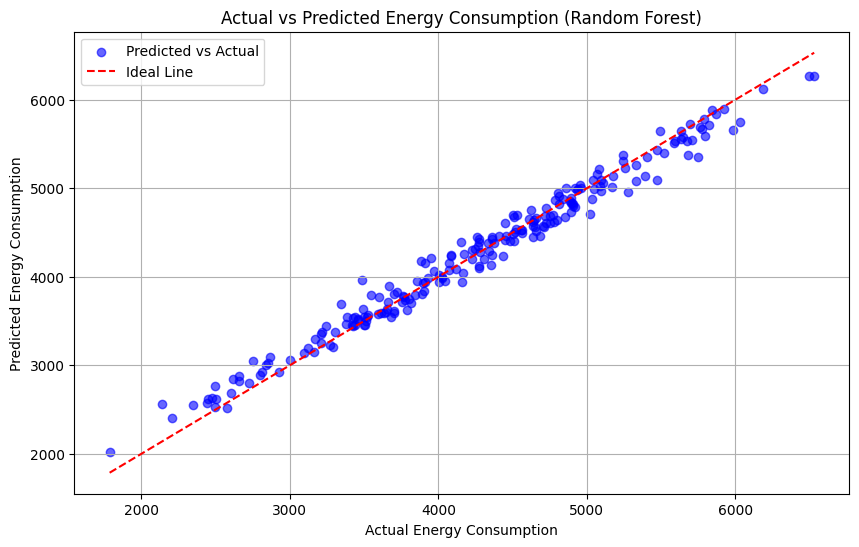

      Actual Energy Consumption  Predicted Energy Consumption (RF)
188                     3384.78                          3548.4996
798                     5168.99                          5012.0715
245                     2580.42                          2518.2975
1021                    4921.73                          4788.1796
648                     2500.56                          2620.9639


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

summary(y_test, y_pred)

Root Mean Squared Error (RMSE): 0.013811402707164647


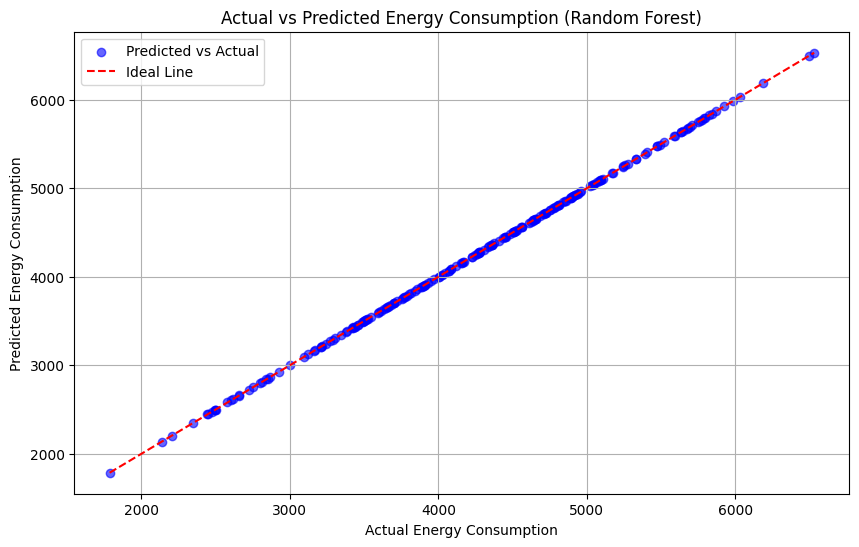

      Actual Energy Consumption  Predicted Energy Consumption (RF)
188                     3384.78                        3384.800391
798                     5168.99                        5169.000576
245                     2580.42                        2580.399448
1021                    4921.73                        4921.749529
648                     2500.56                        2500.550204


In [10]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

summary(y_test, y_pred)